**STAT 685: Dr. Suojin Wang’s Group**

Modeling Seoul Bike Sharing Demand - 004 Forecasting Training

Bai Zou, Nam Tran

# 5 Forecasting

## 5.1 Business Scenaros

The purpose to predict bike demand is to make bikes available and accessible to the public at the right time. Noramlly, the data will be updated on a daily base for analysis. Forecasting to next 24 hours' demand can be conducted for high-level planning of the next day. To test the performance in this business scenario, we assume the data is updated at 0:00 AM of the day and all available data at the moment is used for model training to predict the next 24 hour demands. 

If the infrastructure could support, data can be updated in real-time. Thus, an hourly model training could be conducted to predict the next hour demand. Any changes in the past hours could be considered in the next hour demand prediction. To test the perforamnce, the models will be trained hourly with all the data available at the moment (include demand data from last hour) and used to predict the demand in the next coming hour. 

In [2]:
import os
import sys
project_path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '.'))
sys.path.append(project_path)
from models.utilities_py import *
from models.xgb_estimator_py import *
import json

## 5.2 Daily Forecasting
### 5.2.1 Autocorrelation Features
When data is updated every day, the latest observation available for autocorrelation is lag 24 for all prediction timestamp. Therefore, autocorrelation features are added for demand from same hour 1 day ago, 2 days ago and 1 week ago. The model training is repeated daily for November 2018.

In [4]:
# load data
dat = load_data()
# add past demand information, last day, 2 days ago, 1 week ago
dat_daily = dat.copy()
dat_daily = add_past_hour_demand(dat_daily, [24,48,7*24])
dat_daily.head(2).transpose()

,168,169
Date,2017-12-08 00:00:00,2017-12-08 00:00:00
RentedBikeCount,233,230
Hour,0,1
Temp,-3.5,-3.7
Humidity,49,50
WindSpeed,2.6,2.5
Visibility,1893,1902
DewPointTemp,-12.6,-12.6
SolarRadiation,0,0
Rainfall,0,0


### 5.2.2 Repeated Daily Training and Forecasting
* The model is repeatedly trained daily.
* Only next 24 hour demands are forecasted each time.

In [6]:
date_list = get_default_date_list(dat)
print(f"Models are trained each day for {len(date_list)} days.")

Models are trained each day for 30 days.


In [ ]:
%%capture
# repeat model training and save result
sum_daily_cor, pred_daily_cor= run_repeat_forecast(dat_daily, date_list, None)
with open(os.path.join(project_path, "data/output_daily_cor.json"), 'w') as fp:
    json.dump(sum_daily_cor, fp)
pred_daily_cor.to_csv(os.path.join(project_path, "data/output_pred_daily_cor.csv"), index=True)

In [3]:
# read results
with open(os.path.join(project_path, "data/output_daily_cor.json"), 'r') as fp:
    sum_daily_cor = json.load(fp)
pred_daily_cor = pd.read_csv(os.path.join(project_path, "data/output_pred_daily_cor.csv"), index_col=0)

In [37]:
# printout result
printout_result(sum_daily_cor)

train_score: avg  0.9769; std  0.0006
mean_cv_score: avg  0.7990; std  0.0031
test_score: avg -0.1558; std  4.5441
run_time:  3414.4916
test_r2:  0.8601


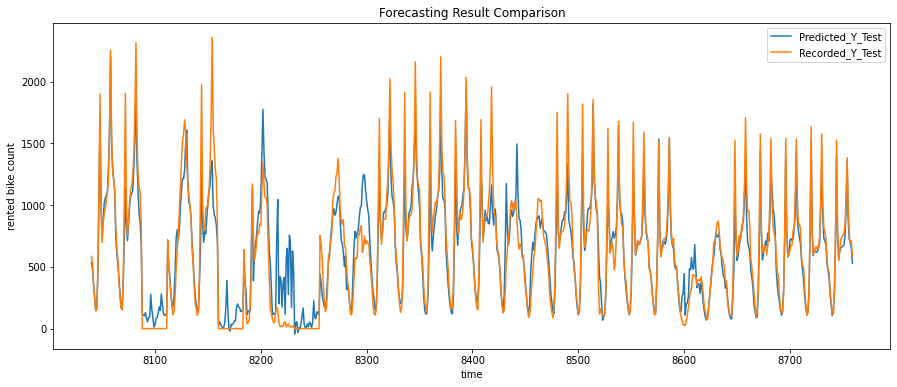

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
_=pred_daily_cor.plot(xlabel="time", ylabel="rented bike count", 
                   title="Forecasting Result Comparison", ax=ax)

## 5.3 Hourly Forecasting
### 5.3.1 Autocorrelation Features
When the data is updated every hour, the last hour demand can be used directly as an autocorrelation feature (lag 1). Therefore, we add demand for 1 hour ago, 2 hours ago, 1 day ago and 1 week ago as autocorrelation features to the data. The modeling training is conducted every hour and used to predict demand only for the coming hour.

In [18]:
# load data
dat = load_data()
# add past demand information, last hour, 2 hours ago, 1 day ago
dat_hourly = dat.copy()
dat_hourly = add_past_hour_demand(dat_hourly, [1,2,24, 24*7])
dat_hourly.head(2).transpose()

,168,169
Date,2017-12-08 00:00:00,2017-12-08 00:00:00
RentedBikeCount,233,230
Hour,0,1
Temp,-3.5,-3.7
Humidity,49,50
WindSpeed,2.6,2.5
Visibility,1893,1902
DewPointTemp,-12.6,-12.6
SolarRadiation,0,0
Rainfall,0,0


### 5.3.2 Repeated Hourly Training and Forecasting
* The model is repeatedly trained hourly.
* Only next 1 hour demands are forecasted each time.

In [ ]:
%%capture
# repeat model training and save result
hour_list = list(range(24))
sum_hourly_cor, pred_hourly_cor= run_repeat_forecast(dat_daily, date_list, hour_list)
with open(os.path.join(project_path, "data/output_hourly_cor.json"), 'w') as fp:
    json.dump(sum_hourly_cor, fp)
pred_hourly_cor.to_csv(os.path.join(project_path, "data/output_pred_hourly_cor.csv"), index=True)

In [4]:
# read results
with open(os.path.join(project_path, "data/output_hourly_cor.json"), 'r') as fp:
    sum_hourly_cor = json.load(fp)
pred_hourly_cor = pd.read_csv(os.path.join(project_path, "data/output_pred_hourly_cor.csv"), index_col=0)

In [20]:
# printout result
printout_result(sum_hourly_cor)

train_score: avg  0.9946; std  0.0001
mean_cv_score: avg  0.9288; std  0.0011
test_score: avg  nan; std  nan
run_time:  91298.7513
test_r2:  0.9636


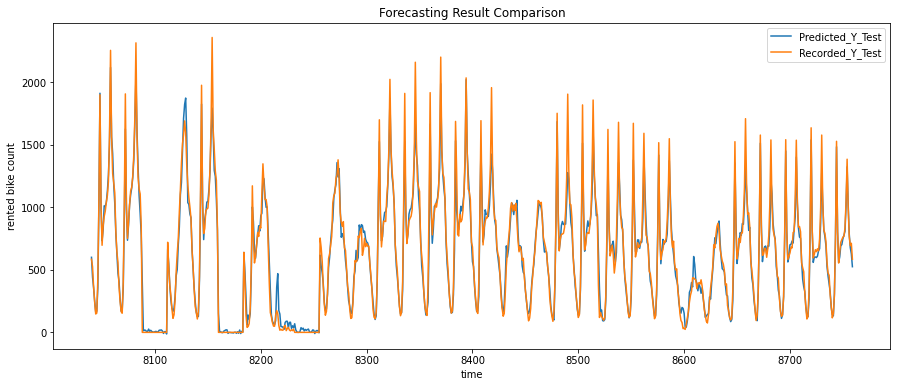

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
_=pred_hourly_cor.plot(xlabel="time", ylabel="rented bike count", 
                   title="Forecasting Result Comparison", ax=ax)

In [40]:
round(compare_table({"Daily": sum_daily_cor, "Hourly": sum_hourly_cor}), 3)

,Daily,Hourly
train_score,0.977,0.995
mean_cv_score,0.799,0.929
test_score,-0.156,NaN
run_time,3414.492,91298.751
test_r2,0.860,0.964


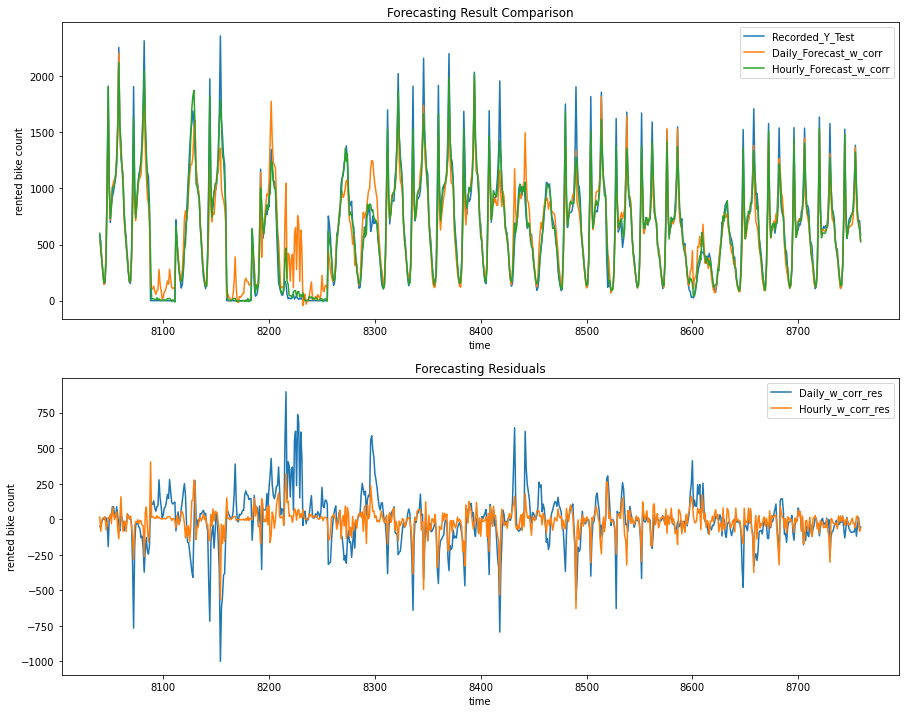

In [41]:
# plot prediction accuracy
compare_df = pred_daily_cor[['Recorded_Y_Test']]
compare_df['Daily_Forecast_w_corr'] = pred_daily_cor['Predicted_Y_Test']
compare_df['Hourly_Forecast_w_corr'] = pred_hourly_cor['Predicted_Y_Test']
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,12))
_=compare_df.plot(xlabel="time", ylabel="rented bike count", 
                   title="Forecasting Result Comparison", ax=ax[0])
compare_df['Daily_w_corr_res'] = compare_df['Daily_Forecast_w_corr'] - compare_df['Recorded_Y_Test'] 
compare_df['Hourly_w_corr_res'] = compare_df['Hourly_Forecast_w_corr'] - compare_df['Recorded_Y_Test']
_=compare_df[['Daily_w_corr_res', 'Hourly_w_corr_res']].plot(xlabel="time", ylabel="rented bike count", 
                   title="Forecasting Residuals", ax=ax[1])

## 5.5 Improvement with Autocorrelations

In [33]:
# load forecasting results without autocorrelation
with open(os.path.join(project_path, "data/output_daily_no_cor.json"), 'r') as fp:
    sum_daily_no_cor = json.load(fp)
pred_daily_no_cor = pd.read_csv(os.path.join(project_path, "data/output_pred_daily_no_cor.csv"), index_col=0)
with open(os.path.join(project_path, "data/output_hourly_no_cor.json"), 'r') as fp:
    sum_hourly_no_cor = json.load(fp)
pred_hourly_no_cor = pd.read_csv(os.path.join(project_path, "data/output_pred_hourly_no_cor.csv"), index_col=0)

In [34]:
round(compare_table({"Daily_with_Autocorrelation": sum_daily_cor, 
                     "Daily_without_Autocorrelation": sum_daily_no_cor,
                     "Hourly_with_Autocorrelation": sum_hourly_cor,
                     "Hourly_without_Autocorrelation": sum_hourly_no_cor
                    }), 3)

,Daily_with_Autocorrelation,Daily_without_Autocorrelation,Hourly_with_Autocorrelation,Hourly_without_Autocorrelation
train_score,0.977,0.960,0.995,0.960
mean_cv_score,0.799,0.686,0.929,0.686
test_score,-0.156,-0.219,NaN,NaN
run_time,3414.492,1988.500,91298.751,54192.148
test_r2,0.860,0.775,0.964,0.817


In [42]:
compare_df['Daily_wo_corr_res'] = pred_daily_no_cor['Predicted_Y_Test'] - pred_daily_no_cor['Recorded_Y_Test']
compare_df['Hourly_wo_corr_res'] = pred_hourly_no_cor['Predicted_Y_Test'] - pred_hourly_no_cor['Recorded_Y_Test']

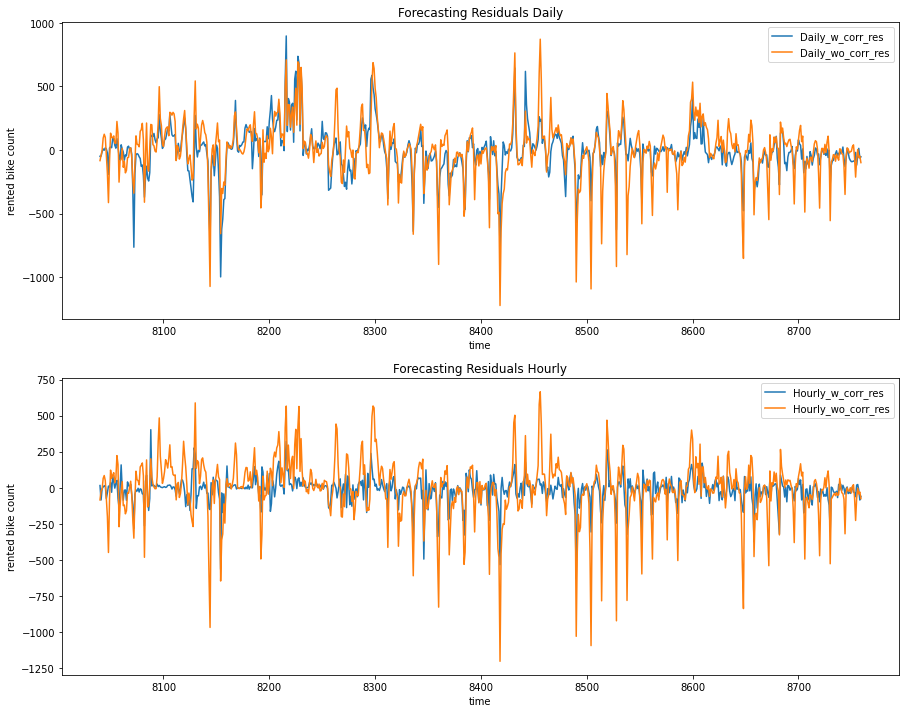

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,12))
_=compare_df[['Daily_w_corr_res', 'Daily_wo_corr_res']].plot(xlabel="time", ylabel="rented bike count", 
                   title="Forecasting Residuals Daily", ax=ax[0])
_=compare_df[['Hourly_w_corr_res', 'Hourly_wo_corr_res']].plot(xlabel="time", ylabel="rented bike count", 
                   title="Forecasting Residuals Hourly", ax=ax[1])